In [1]:
#import libraries
import pandas as pd
import json
import re
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
import pprint
warnings.simplefilter('ignore')

In [2]:
#read all files
for file in os.listdir("./all_nutrition"):
    print(file)

nutrition1.csv
nutrition2.csv
nutrition3.csv
nutrition4.csv
nutrition5.csv
nutrition6.csv
nutrition7.csv
nutrition8.csv
nutrition9.csv


In [3]:
#store all csv into a dataframe
df_list = []
for file in os.listdir("./all_nutrition"):
    if file.endswith(".csv"):
        nutrition_df = pd.read_csv(f"./all_nutrition/{file}")#, sep=";")#, parse_dates=True)
        df_list.append(nutrition_df)
nutrition_df = pd.concat(df_list, sort=True)

In [4]:
nutrition_df

,Alcohol g,Caffeine mg,Calcium mg,Calories kcal,Carbohydrates g,Cholesterol mg,Copper mg,Fat g,Fiber g,Folate µg,...,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg,recipe_id
0,NaN,NaN,139.72,625.07,71.66,0.00,0.97,30.69,9.56,191.83,...,0.33,1.67,0.88,0.63,81.79,NaN,3.29,5.16,3.60,715769
1,NaN,NaN,224.86,221.45,49.50,0.00,1.07,0.82,25.12,310.98,...,0.31,4.82,1.56,0.57,54.16,NaN,0.99,76.29,2.32,648257
2,NaN,NaN,106.77,468.07,76.92,0.00,0.74,9.76,8.89,226.32,...,0.80,9.43,2.35,0.75,9.95,0.23,1.15,75.55,2.49,1095745
3,NaN,NaN,67.51,466.44,67.36,0.00,0.23,16.31,5.48,201.59,...,0.38,6.24,0.69,0.43,112.65,NaN,4.04,27.59,1.35,658753
4,NaN,NaN,74.17,232.48,16.15,0.00,0.12,18.01,6.48,103.78,...,0.15,1.27,0.53,0.38,144.82,NaN,4.01,311.62,0.73,658515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,104.56,42.48,5.92,3.00,0.03,0.93,0.76,8.57,...,0.11,NaN,0.31,0.06,2.52,NaN,NaN,NaN,0.52,660959
96,NaN,NaN,15.41,198.50,37.76,0.00,0.08,2.59,2.02,89.22,...,0.24,2.88,0.23,0.05,1.10,NaN,0.56,2.02,0.41,651186
97,NaN,NaN,203.81,444.82,51.50,54.82,0.11,20.70,1.75,119.16,...,0.49,3.85,0.51,0.10,0.94,0.16,0.29,1.11,0.81,1450327
98,NaN,NaN,157.56,102.88,12.45,15.93,0.03,4.02,2.17,16.19,...,0.18,NaN,0.53,0.09,8.98,NaN,NaN,NaN,0.79,627875


In [5]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 99
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Alcohol g            98 non-null     float64
 1   Caffeine mg          6 non-null      float64
 2   Calcium mg           699 non-null    float64
 3   Calories kcal        711 non-null    float64
 4   Carbohydrates g      711 non-null    float64
 5   Cholesterol mg       711 non-null    float64
 6   Copper mg            699 non-null    float64
 7   Fat g                711 non-null    float64
 8   Fiber g              685 non-null    float64
 9   Folate µg            696 non-null    float64
 10  Iron mg              702 non-null    float64
 11  Magnesium mg         703 non-null    float64
 12  Manganese mg         701 non-null    float64
 13  Net Carbohydrates g  711 non-null    float64
 14  Phosphorus mg        705 non-null    float64
 15  Potassium mg         705 non-null    floa

In [6]:
nutrition_df.fillna(value=0,inplace=True)

In [7]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 0 to 99
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Alcohol g            711 non-null    float64
 1   Caffeine mg          711 non-null    float64
 2   Calcium mg           711 non-null    float64
 3   Calories kcal        711 non-null    float64
 4   Carbohydrates g      711 non-null    float64
 5   Cholesterol mg       711 non-null    float64
 6   Copper mg            711 non-null    float64
 7   Fat g                711 non-null    float64
 8   Fiber g              711 non-null    float64
 9   Folate µg            711 non-null    float64
 10  Iron mg              711 non-null    float64
 11  Magnesium mg         711 non-null    float64
 12  Manganese mg         711 non-null    float64
 13  Net Carbohydrates g  711 non-null    float64
 14  Phosphorus mg        711 non-null    float64
 15  Potassium mg         711 non-null    floa

In [8]:
new_nutrition_df=nutrition_df[['recipe_id','Carbohydrates g','Calories kcal','Fat g','Protein g']]
new_nutrition_df

,recipe_id,Carbohydrates g,Calories kcal,Fat g,Protein g
0,715769,71.66,625.07,30.69,19.86
1,648257,49.50,221.45,0.82,15.21
2,1095745,76.92,468.07,9.76,21.49
3,658753,67.36,466.44,16.31,13.70
4,658515,16.15,232.48,18.01,5.82
...,...,...,...,...,...
95,660959,5.92,42.48,0.93,2.91
96,651186,37.76,198.50,2.59,5.30
97,1450327,51.50,444.82,20.70,13.14
98,627875,12.45,102.88,4.02,4.69


In [9]:
#Creating new dataframe with selected nutrition elements
new_nutrition_df.to_csv('./final/new_nutrition.csv',index=False)

# Removing Duplicate rows

In [10]:
print(nutrition_df.duplicated().sum())

62


In [11]:
nutrition_df.drop_duplicates(inplace=True)
nutrition_df.rename(columns={'recipe_id':'id'},inplace=True)
nutrition_df

,Alcohol g,Caffeine mg,Calcium mg,Calories kcal,Carbohydrates g,Cholesterol mg,Copper mg,Fat g,Fiber g,Folate µg,...,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg,id
0,0.0,0.0,139.72,625.07,71.66,0.00,0.97,30.69,9.56,191.83,...,0.33,1.67,0.88,0.63,81.79,0.00,3.29,5.16,3.60,715769
1,0.0,0.0,224.86,221.45,49.50,0.00,1.07,0.82,25.12,310.98,...,0.31,4.82,1.56,0.57,54.16,0.00,0.99,76.29,2.32,648257
2,0.0,0.0,106.77,468.07,76.92,0.00,0.74,9.76,8.89,226.32,...,0.80,9.43,2.35,0.75,9.95,0.23,1.15,75.55,2.49,1095745
3,0.0,0.0,67.51,466.44,67.36,0.00,0.23,16.31,5.48,201.59,...,0.38,6.24,0.69,0.43,112.65,0.00,4.04,27.59,1.35,658753
4,0.0,0.0,74.17,232.48,16.15,0.00,0.12,18.01,6.48,103.78,...,0.15,1.27,0.53,0.38,144.82,0.00,4.01,311.62,0.73,658515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,104.56,42.48,5.92,3.00,0.03,0.93,0.76,8.57,...,0.11,0.00,0.31,0.06,2.52,0.00,0.00,0.00,0.52,660959
96,0.0,0.0,15.41,198.50,37.76,0.00,0.08,2.59,2.02,89.22,...,0.24,2.88,0.23,0.05,1.10,0.00,0.56,2.02,0.41,651186
97,0.0,0.0,203.81,444.82,51.50,54.82,0.11,20.70,1.75,119.16,...,0.49,3.85,0.51,0.10,0.94,0.16,0.29,1.11,0.81,1450327
98,0.0,0.0,157.56,102.88,12.45,15.93,0.03,4.02,2.17,16.19,...,0.18,0.00,0.53,0.09,8.98,0.00,0.00,0.00,0.79,627875


In [12]:
nutri_recipes=pd.read_csv('./final/all_recipes_new_df.csv')
nutri_recipes

,Unnamed: 0,cuisines,dish,ingredients_lists,id,image,ingredients,instructions,readyInMinutes,servings,...,yellow onion,yellow onions,yellow squash,yoghurt,yogurt,yukon gold potatoes,za'atar,ziti pasta,zucchini,zucchini squash
0,8,"['Mediterranean', 'Italian', 'European']",1,"['broccolini', 'garlic clove', 'olive oil', 'o...",715769,https://spoonacular.com/recipeImages/715769-31...,"{'broccolini': '0.5 bunch', 'garlic clove': '0...",In a large pan with lid heat olive oil over me...,30,2,...,0,0,0.0,0,0,0,0,0,0,0.0
1,12,Italian,1,"['artichoke', 'bay leaf', 'coriander seeds', '...",648257,https://spoonacular.com/recipeImages/648257-31...,"{'artichoke': '1.0 pound', 'bay leaf': '1.0 ',...",Snip the thorns off the artichoke leaves.Place...,35,1,...,0,0,0.0,0,0,0,0,0,0,0.0
2,16,Italian,1,"['crusty bread', 'mushrooms', 'spinach', 'chic...",1095745,https://spoonacular.com/recipeImages/1095745-3...,"{'crusty bread': '0.25 loaf', 'mushrooms': '0....","To make the hummus, place all ingredients in a...",30,4,...,0,0,0.0,0,0,0,0,0,0,0.0
3,20,Italian,1,"['balsamic vinegar', 'extra virgin olive oil',...",658753,https://spoonacular.com/recipeImages/658753-31...,"{'balsamic vinegar': '0.5 tablespoons', 'extra...",Slice the bread on a bias about 1/2 inch thick...,45,4,...,0,0,0.0,0,0,0,0,0,0,0.0
4,24,Italian,1,"['balsamic vinegar', 'brussels sprouts', 'extr...",658515,https://spoonacular.com/recipeImages/658515-31...,"{'balsamic vinegar': '0.25 tablespoon', 'bruss...",Heat oven to 450 degrees. Trim bottom of Bruss...,45,4,...,0,0,0.0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,817,"['Indian', 'Asian']",1,"['capsicums', 'fresh mint leaves', 'green chil...",645769,https://spoonacular.com/recipeImages/645769-31...,"{'capsicums': '1.0 servings', 'fresh mint leav...",Remove heads and shells from prawns but leave ...,45,4,...,0,0.0,0,0,0,0,0,0,0,0.0
628,818,"['Indian', 'Asian']",0,"['low fat yogurt', 'water', 'green chilli', 's...",660959,https://spoonacular.com/recipeImages/660959-31...,"{'low fat yogurt': '50.0 milliliters', 'water'...",Whisk yogurt with water until well-mixed.Add c...,45,4,...,0,0.0,0,0,0,0,0,0,0,0.0
629,819,"['Indian', 'Asian']",0,"['wheat flour', 'all purpose flour', 'onion', ...",651186,https://spoonacular.com/recipeImages/651186-31...,"{'wheat flour': '0.25 cups', 'all purpose flou...",Heat 2tsp of oil in a pan add mustard seeds an...,45,8,...,0,0.0,0,0,0,0,0,0,0,0.0
630,820,"['Indian', 'Asian']",0,"['flour', 'greek yogurt', 'baking powder', 'sa...",1450327,https://spoonacular.com/recipeImages/1450327-3...,"{'flour': '0.5 cups', 'greek yogurt': '0.31 cu...",Preheat oven to 350 degrees F.Mix together the...,30,4,...,0,0.0,0,0,0,0,0,0,0,0.0


In [13]:
nutri_eda_df=nutri_recipes.merge(nutrition_df,on='id')
nutri_eda_df

,Unnamed: 0,cuisines,dish,ingredients_lists,id,image,ingredients,instructions,readyInMinutes,servings,...,Vitamin B12 µg,Vitamin B2 mg,Vitamin B3 mg,Vitamin B5 mg,Vitamin B6 mg,Vitamin C mg,Vitamin D µg,Vitamin E mg,Vitamin K µg,Zinc mg
0,8,"['Mediterranean', 'Italian', 'European']",1,"['broccolini', 'garlic clove', 'olive oil', 'o...",715769,https://spoonacular.com/recipeImages/715769-31...,"{'broccolini': '0.5 bunch', 'garlic clove': '0...",In a large pan with lid heat olive oil over me...,30,2,...,0.00,0.33,1.67,0.88,0.63,81.79,0.00,3.29,5.16,3.60
1,12,Italian,1,"['artichoke', 'bay leaf', 'coriander seeds', '...",648257,https://spoonacular.com/recipeImages/648257-31...,"{'artichoke': '1.0 pound', 'bay leaf': '1.0 ',...",Snip the thorns off the artichoke leaves.Place...,35,1,...,0.00,0.31,4.82,1.56,0.57,54.16,0.00,0.99,76.29,2.32
2,16,Italian,1,"['crusty bread', 'mushrooms', 'spinach', 'chic...",1095745,https://spoonacular.com/recipeImages/1095745-3...,"{'crusty bread': '0.25 loaf', 'mushrooms': '0....","To make the hummus, place all ingredients in a...",30,4,...,0.00,0.80,9.43,2.35,0.75,9.95,0.23,1.15,75.55,2.49
3,20,Italian,1,"['balsamic vinegar', 'extra virgin olive oil',...",658753,https://spoonacular.com/recipeImages/658753-31...,"{'balsamic vinegar': '0.5 tablespoons', 'extra...",Slice the bread on a bias about 1/2 inch thick...,45,4,...,0.00,0.38,6.24,0.69,0.43,112.65,0.00,4.04,27.59,1.35
4,24,Italian,1,"['balsamic vinegar', 'brussels sprouts', 'extr...",658515,https://spoonacular.com/recipeImages/658515-31...,"{'balsamic vinegar': '0.25 tablespoon', 'bruss...",Heat oven to 450 degrees. Trim bottom of Bruss...,45,4,...,0.00,0.15,1.27,0.53,0.38,144.82,0.00,4.01,311.62,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,817,"['Indian', 'Asian']",1,"['capsicums', 'fresh mint leaves', 'green chil...",645769,https://spoonacular.com/recipeImages/645769-31...,"{'capsicums': '1.0 servings', 'fresh mint leav...",Remove heads and shells from prawns but leave ...,45,4,...,0.19,0.16,1.00,0.50,0.27,112.55,0.00,3.67,14.16,0.59
628,818,"['Indian', 'Asian']",0,"['low fat yogurt', 'water', 'green chilli', 's...",660959,https://spoonacular.com/recipeImages/660959-31...,"{'low fat yogurt': '50.0 milliliters', 'water'...",Whisk yogurt with water until well-mixed.Add c...,45,4,...,0.28,0.11,0.00,0.31,0.06,2.52,0.00,0.00,0.00,0.52
629,819,"['Indian', 'Asian']",0,"['wheat flour', 'all purpose flour', 'onion', ...",651186,https://spoonacular.com/recipeImages/651186-31...,"{'wheat flour': '0.25 cups', 'all purpose flou...",Heat 2tsp of oil in a pan add mustard seeds an...,45,8,...,0.00,0.24,2.88,0.23,0.05,1.10,0.00,0.56,2.02,0.41
630,820,"['Indian', 'Asian']",0,"['flour', 'greek yogurt', 'baking powder', 'sa...",1450327,https://spoonacular.com/recipeImages/1450327-3...,"{'flour': '0.5 cups', 'greek yogurt': '0.31 cu...",Preheat oven to 350 degrees F.Mix together the...,30,4,...,0.49,0.49,3.85,0.51,0.10,0.94,0.16,0.29,1.11,0.81


In [14]:
nutri_eda_df.to_csv("./final/nutri_eda_df.csv")

<AxesSubplot:ylabel='title'>

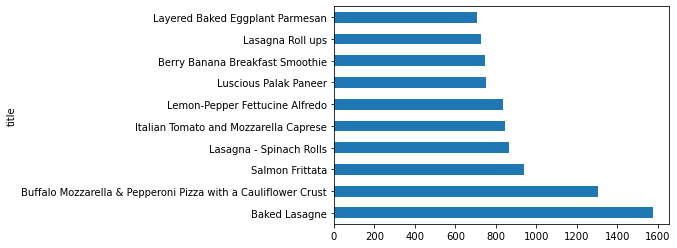

In [15]:
nutri_eda_df.groupby(['title'])["Calcium mg"].max().sort_values(ascending=False).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

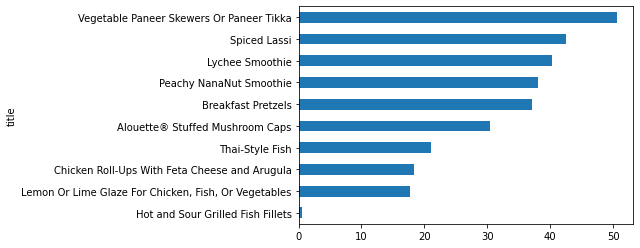

In [16]:
nutri_eda_df.groupby(['title'])["Calories kcal"].min().sort_values(ascending=True).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

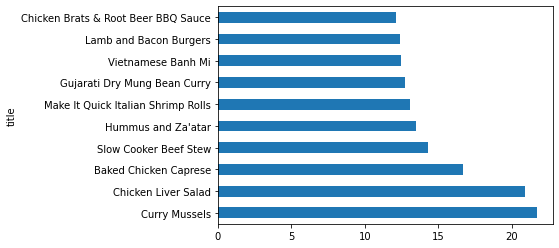

In [17]:
nutri_eda_df.groupby(['title'])["Iron mg"].max().sort_values(ascending=False).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

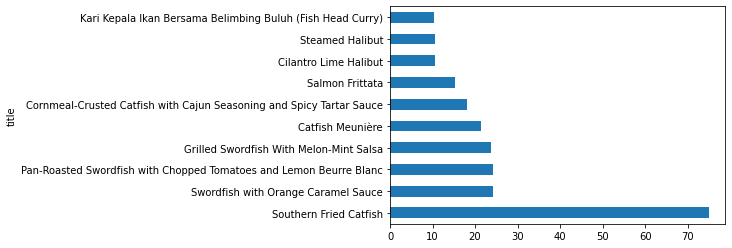

In [18]:
nutri_eda_df.groupby(['title'])["Vitamin D µg"].max().sort_values(ascending=False).head(10).plot.barh()

<AxesSubplot:ylabel='title'>

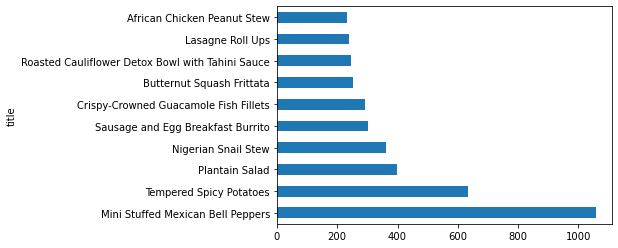

In [19]:
nutri_eda_df.groupby(['title'])["Vitamin C mg"].max().sort_values(ascending=False).head(10).plot.barh()